In [1]:
# K Dheeraj Reddy; BL.EN.U4CSE21076; CSE - B; SEM - V; LAB -> 4
import pandas as pd
import numpy as np
data=pd.read_csv('lab.csv')
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
#A1
import math
def calculate_entropy(target_col):
    value_counts = target_col.value_counts()
    total_samples = len(target_col)
    entropy = 0

    for count in value_counts:
        probability = count / total_samples
        entropy -= probability * math.log2(probability)

    return entropy
def calculate_information_gain(data, feature, target_column):
    unique_values = data[feature].unique()
    entropy_before_split = calculate_entropy(data[target_column])
    weighted_entropy_after_split = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        probability = len(subset) / len(data)
        weighted_entropy_after_split += probability * calculate_entropy(subset[target_column])

    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

target_variable = 'buys_computer'
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {feature: calculate_information_gain(data, feature, target_variable) for feature in features}
root_node = max(information_gains, key=information_gains.get)

print("Information Gains of all features:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")
print(f"The root node for the decision tree is with highest information gain value is: {root_node}")


Information Gains of all features:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The root node for the decision tree is with highest information gain value is: age


In [3]:
#A2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
X = data.drop('buys_computer', axis=1)
y = data['buys_computer']
Tr_X, _, Tr_y, _ = train_test_split(X, y, test_size=0.1, random_state=40)
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
Tr_X_encoded = encoder.fit_transform(Tr_X)
model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)
training_accuracy = model.score(Tr_X_encoded, Tr_y)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Depth of the constructed tree:", tree_depth)

Training Set Accuracy: 1.0
Depth of the constructed tree: 5


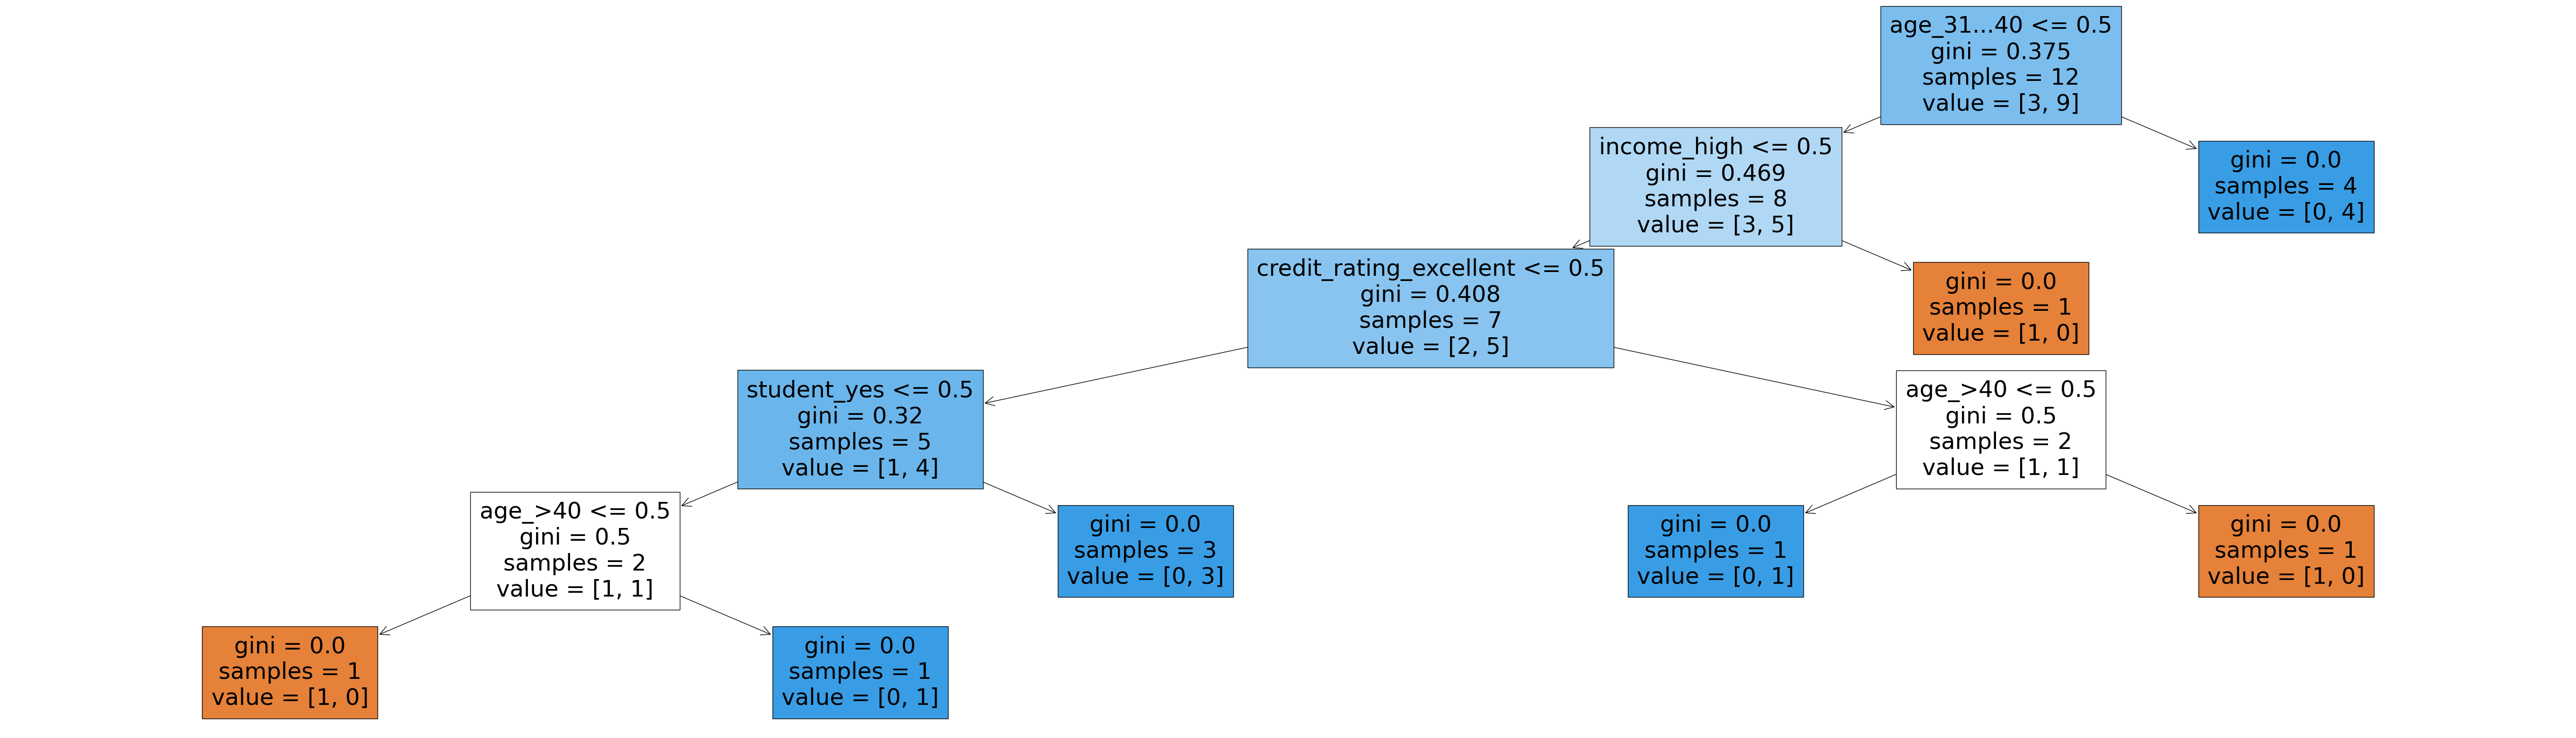

In [4]:
#A3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=encoder.get_feature_names_out(input_features=Tr_X.columns))
plt.show()

Training Set Accuracy: 0.83
Test Set Accuracy: 0.04


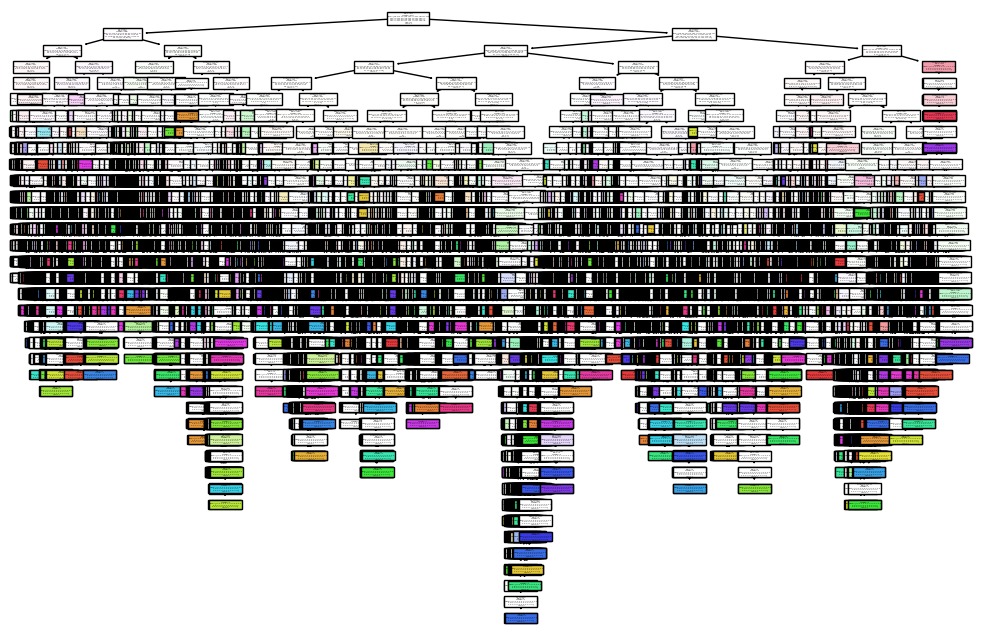

In [5]:
#A4 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
data = pd.read_csv("10K_updated_dataset.csv")
X = data[['polarity', 'subjectivity', 'len']]  
y = data['category'] 
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
Tr_y_pred = model.predict(Tr_X)
Te_y_pred = model.predict(Te_X)
training_accuracy = accuracy_score(Tr_y, Tr_y_pred)
test_accuracy = accuracy_score(Te_y, Te_y_pred)
print(f"Training Set Accuracy: {training_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in model.classes_])
plt.show()

Training Set Accuracy (max_depth=5): 0.08
Test Set Accuracy (max_depth=5): 0.08


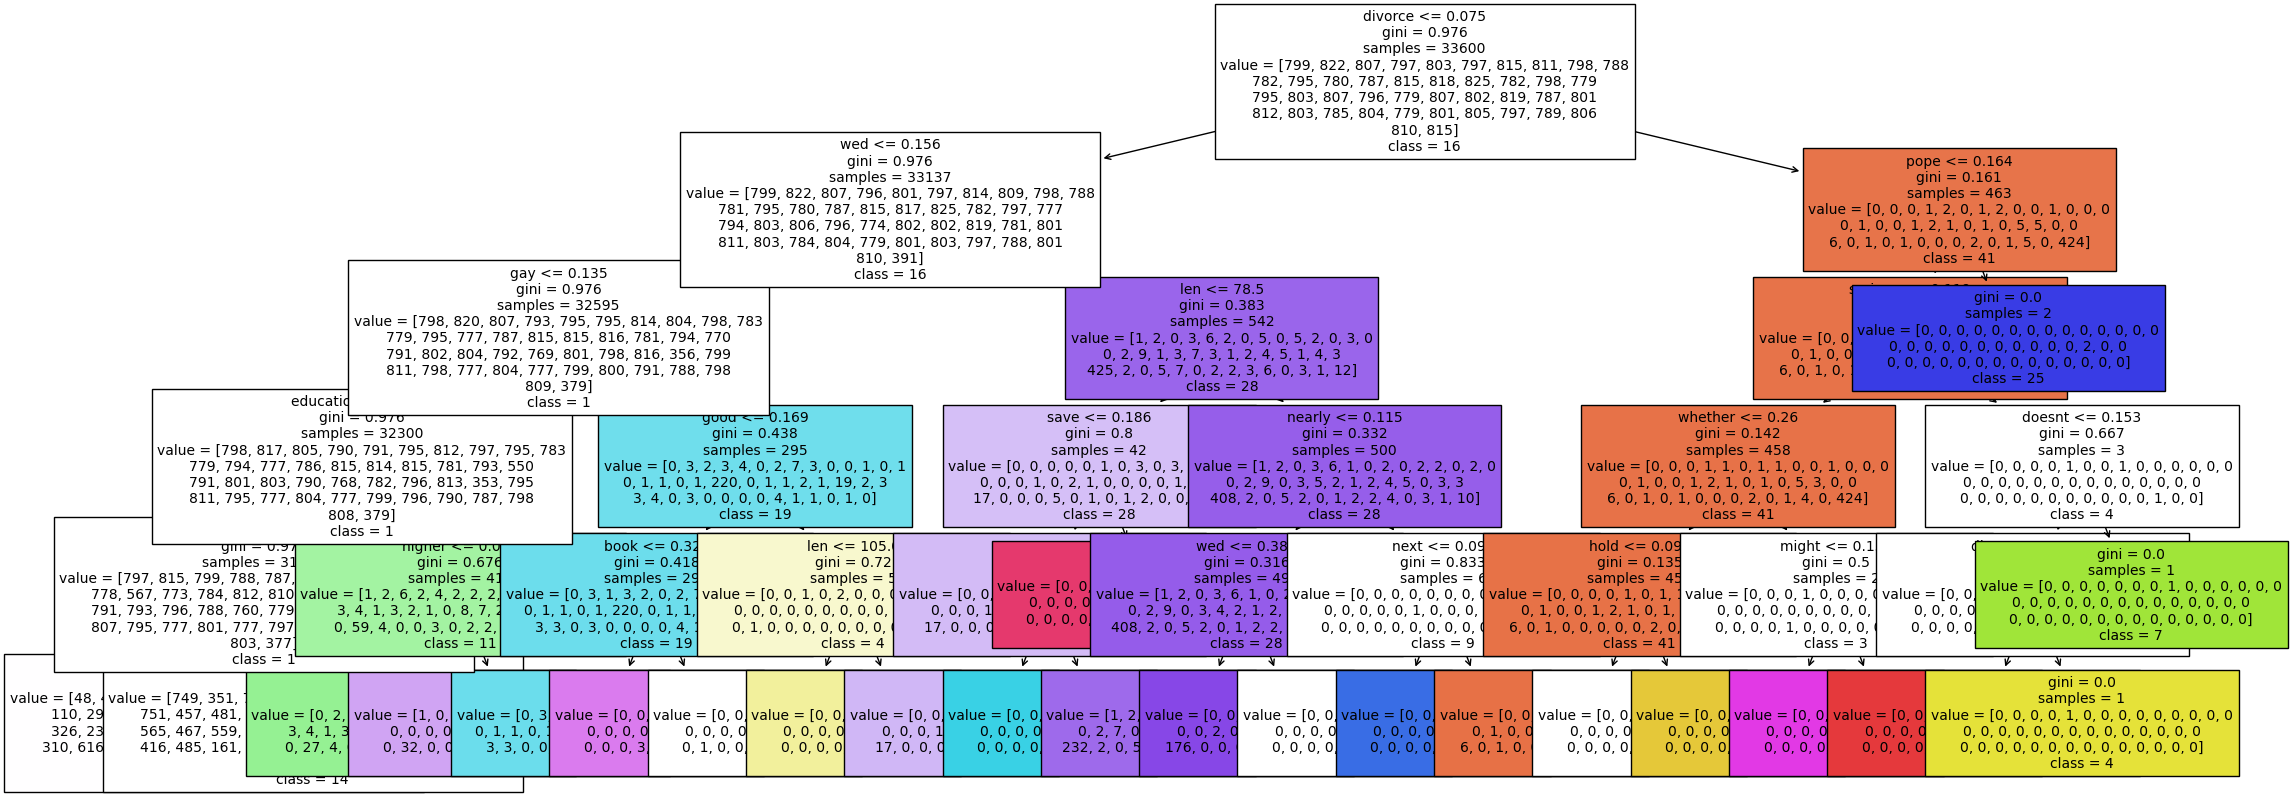

In [6]:
#A5
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
data = pd.read_csv("preprocessed_data - preprocessed_data.csv")
data['text'].fillna("", inplace=True)
X_text = data['text']  
X_numeric = data[['polarity', 'subjectivity', 'len']]  
X = pd.concat([X_text, X_numeric], axis=1)  
y = data['category']  
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_combined = pd.concat([pd.DataFrame(X_text_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out()),
                        X_numeric], axis=1)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)
Tr_y_pred = model.predict(Tr_X)
Te_y_pred = model.predict(Te_X)
training_accuracy = accuracy_score(Tr_y, Tr_y_pred)
test_accuracy = accuracy_score(Te_y, Te_y_pred)
print(f"Training Set Accuracy (max_depth=5): {training_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth=5): {test_accuracy:.2f}")
plt.figure(figsize=(26, 10)) 
plot_tree(model, filled=True, feature_names=list(X_combined.columns), class_names=[str(c) for c in model.classes_], fontsize=10)
plt.show()

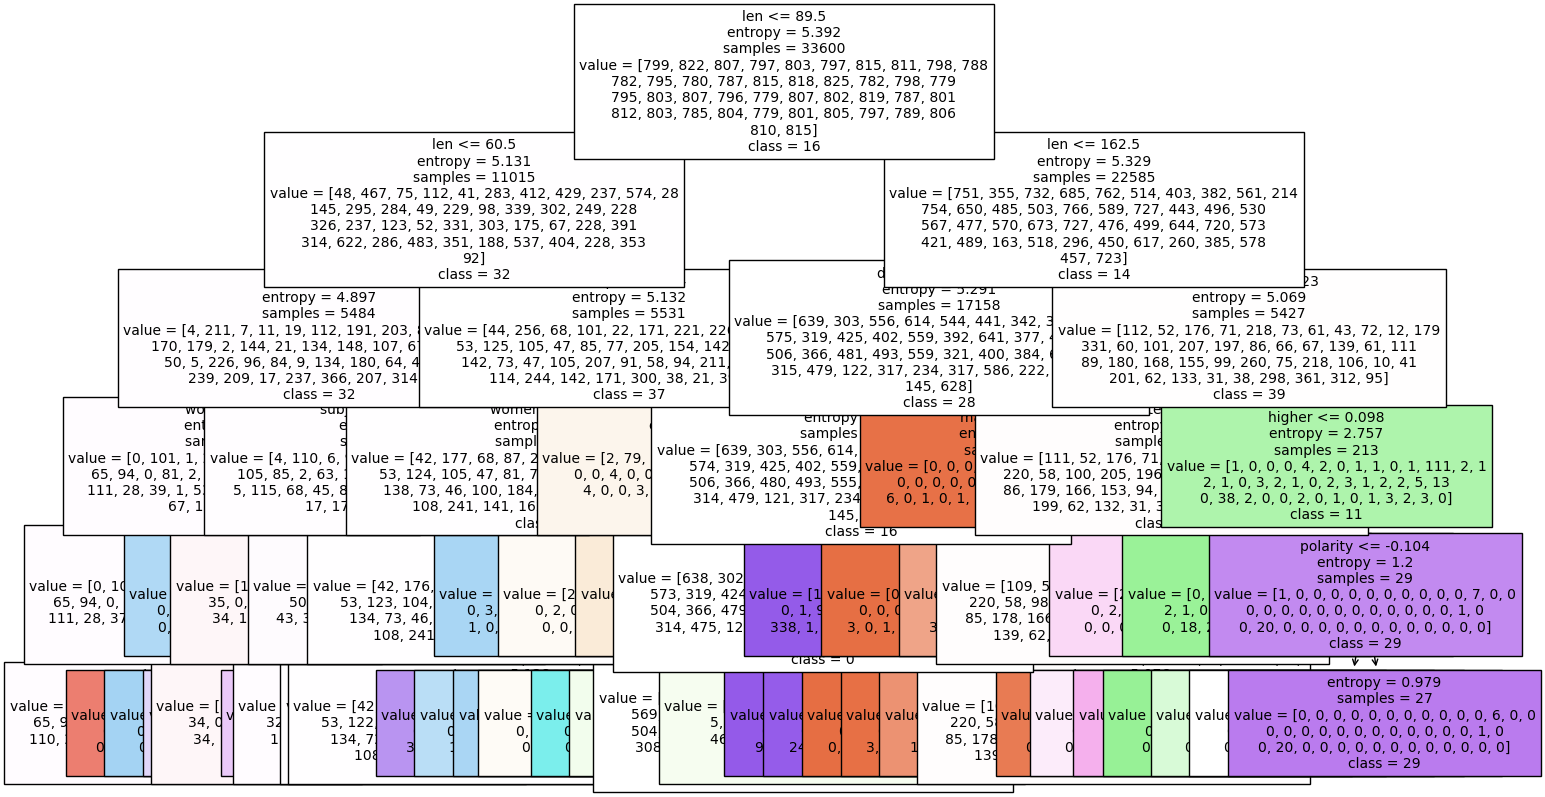

In [7]:
#A6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
data = pd.read_csv("preprocessed_data - preprocessed_data.csv")
data['text'].fillna("", inplace=True)
X_text = data['text']  
X_numeric = data[['polarity', 'subjectivity', 'len']] 
X = pd.concat([X_text, X_numeric], axis=1) 
y = data['category'] 
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_combined = pd.concat([pd.DataFrame(X_text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()),
                        X_numeric], axis=1)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)  
model_entropy.fit(Tr_X, Tr_y)
plt.figure(figsize=(16, 10))
plot_tree(model_entropy, filled=True, feature_names=list(X_combined.columns), class_names=[str(c) for c in model.classes_], fontsize=10)
plt.show()

In [9]:
#A7
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from scipy.sparse import hstack  
your_data=pd.read_csv("preprocessed_data - preprocessed_data.csv")
your_data['text'] = your_data['text'].fillna('')
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf_vectorizer.fit_transform(your_data['text'])
X_numeric = your_data[['polarity', 'subjectivity', 'len']]
X = hstack([X_text, X_numeric])
y = your_data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

Decision Tree Classifier:
Accuracy: 0.2509523809523809
Precision: 0.25338806314733137
Recall: 0.2509523809523809
F1 Score: 0.2512701933024239

Random Forest Classifier:
Accuracy: 0.4002380952380952
Precision: 0.4037766830969964
Recall: 0.4002380952380952
F1 Score: 0.39540410069143206


In [11]:
#A8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
data = pd.read_csv('preprocessed_data - preprocessed_data.csv')
X = data[['polarity', 'subjectivity', 'len']]  
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
train_accuracy = decision_tree_model.score(X_train, y_train)
test_accuracy = decision_tree_model.score(X_test, y_test)
print("Decision Tree Classifier:")
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)
max_depth_decision_tree = DecisionTreeClassifier(max_depth=5)
max_depth_decision_tree.fit(X_train, y_train)
entropy_decision_tree = DecisionTreeClassifier(criterion="entropy")
entropy_decision_tree.fit(X_train, y_train)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Test Set Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_confusion_matrix)
feature_importances = random_forest_model.feature_importances_
print("Feature Importances:", feature_importances)
individual_trees = random_forest_model.estimators_

Decision Tree Classifier:
Training Set Accuracy: 0.7702678571428572
Test Set Accuracy: 0.04690476190476191
Random Forest Classifier:
Test Set Accuracy: 0.05023809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.07      0.06       201
           1       0.02      0.02      0.02       178
           2       0.01      0.01      0.01       193
           3       0.07      0.09      0.08       203
           4       0.02      0.02      0.02       197
           5       0.07      0.06      0.07       203
           6       0.04      0.04      0.04       185
           7       0.04      0.04      0.04       189
           8       0.04      0.04      0.04       202
           9       0.06      0.06      0.06       212
          10       0.03      0.03      0.03       218
          11       0.04      0.03      0.03       205
          12       0.07      0.06      0.07       220
          13       0.03      0.02      0.03    